-**TEXAS SALARY PREDICTION**
-
->Here we have the dataset of texas state offices and their employement details such as work weeks and salary. Our task is to develop a 
predictive model which gives insight and payroll information of the state of Texas.

->The dataset provided needs to be cleaned & processed first before training the Machine learning models.We processed the null values, dealt with categorical values and continuous values & performed **Exploratory Data Analysis (EDA)**. 

-> EDA gives us a vast insight on how the data is distributed, whats the relevance of one field with another and the findings of the data and its values.

->Many columns in the data are not normally distributed and have many **outliers**, our task was also to compute these outliers which can affect the model performance.

->Different departments and Status of the role have a **disparity in annual salary**. We have also analyzed that according to different class of employees.

->Furthermore, We trained various ML models and fit them in our data to predict.Out of the 5, XGbregressor and RandomForest gave the best r2_score and accuracy. (**0.94**)

->To improve the model performance, **Hyperparameter tuning** is done with different parameters to define the best parameter for XGBoost and Randomforest. 


In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading the dataset
data=pd.read_csv('salary_csv.csv')
data.head(4)

C:\Users\miral.MIRAL-K\AppData\Local\Temp\ipykernel_24692\1574960735.py:2: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('salary_csv.csv')


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True


### BASIC CHECKS ###

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

#### Here we have a few columns in which the datatype is varying which needs to be solved ###

In [4]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [5]:
data.shape

(149481, 21)

In [6]:
data.isna().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

#### Almost 90+ % of the data in last 5 columns is null, so we can drop them ####

In [7]:
data.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs','hide_from_search','summed_annual_salary','STATE NUMBER'], axis=1,inplace=True)

In [8]:
data.head(3)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84


#### Checking for Outliers ####

<Axes: ylabel='ANNUAL'>

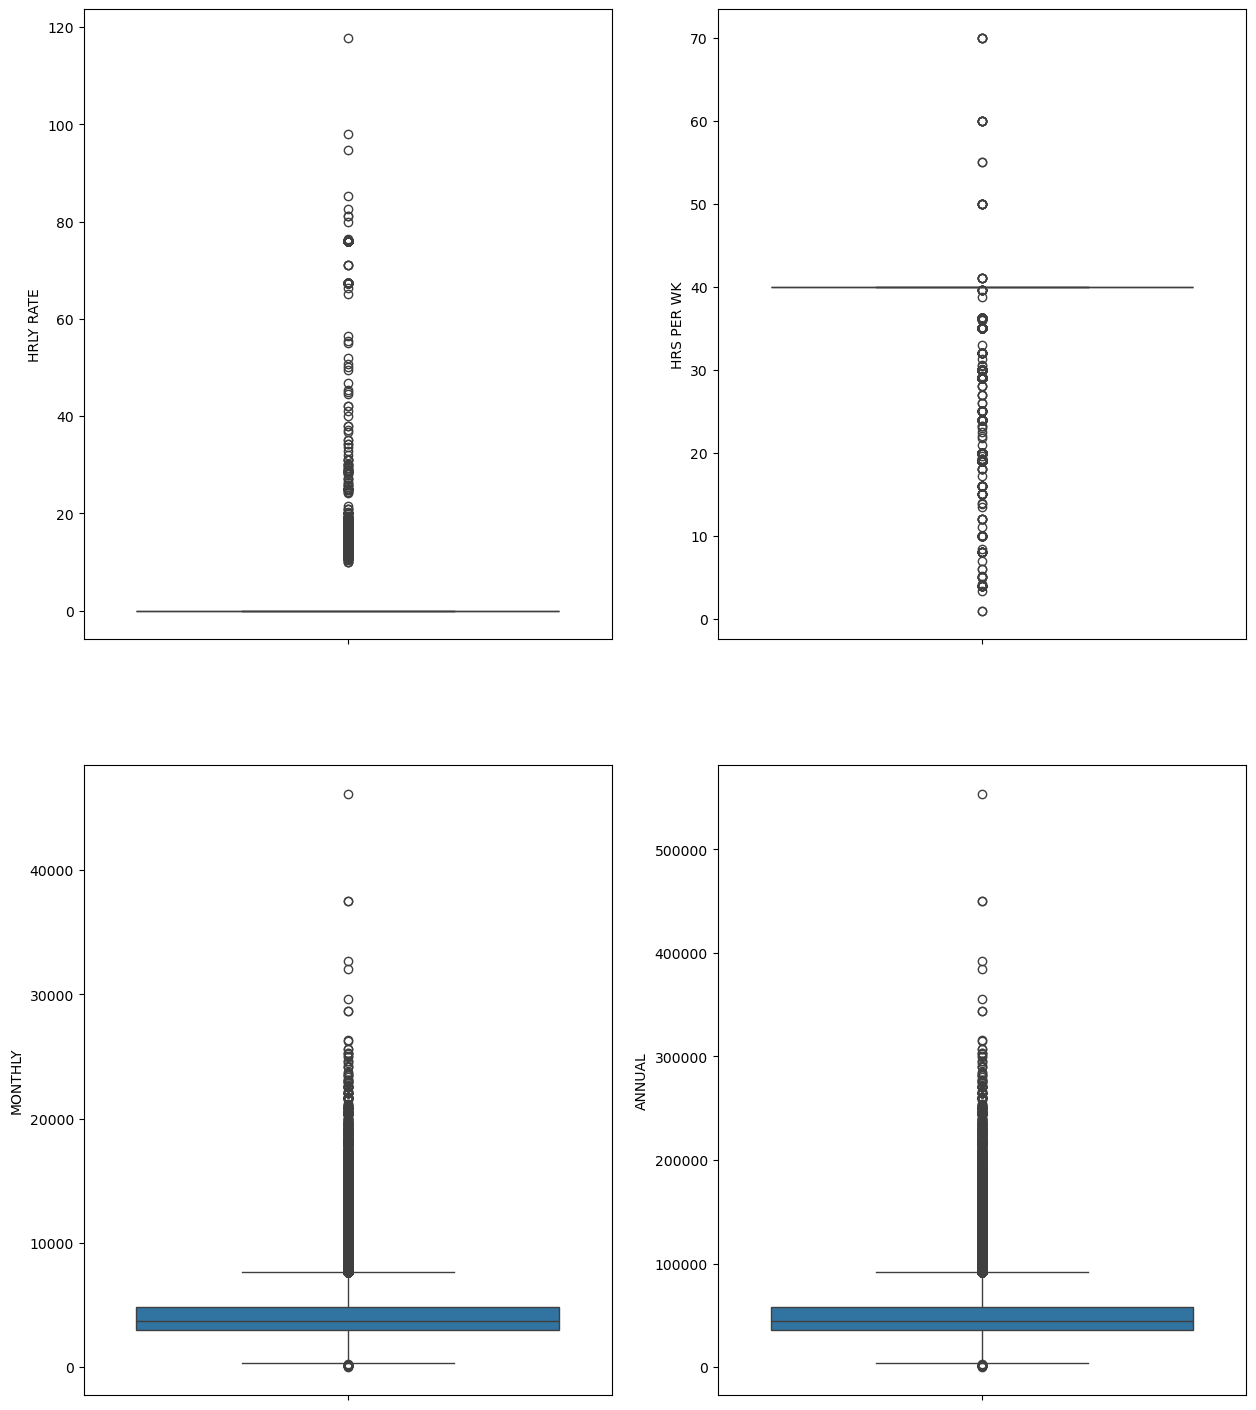

In [9]:
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize= (15,18))
sns.boxplot(data['HRLY RATE'], ax= ax[0,0])
sns.boxplot(data['HRS PER WK'], ax= ax[0,1])
sns.boxplot(data['MONTHLY'], ax= ax[1,0])
sns.boxplot(data['ANNUAL'], ax= ax[1,1])

#### We have quite a lot of outliers as seen in the boxplot, thus, processing the outliers by Inter Quartile Range method ####

In [10]:
def find_boundaries(variable):
    
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr #to find the minimum value
    upper_range = q3 + 1.5 * iqr#max value
    return lower_range, upper_range

In [11]:
lower_ANNUAL, upper_ANNUAL = find_boundaries('ANNUAL')
print(lower_ANNUAL, upper_ANNUAL)

#capp the outlier / censoring the outlier
data.ANNUAL = np.where( data.ANNUAL > upper_ANNUAL, upper_ANNUAL, data.ANNUAL )
data.ANNUAL = np.where( data.ANNUAL < lower_ANNUAL, lower_ANNUAL, data.ANNUAL )

3010.6200000000026 91617.18


In [12]:
lower_MONTHLY, upper_MONTHLY = find_boundaries('MONTHLY')
print(lower_MONTHLY, upper_MONTHLY)

#capp the outlier / censoring the outlier
data.MONTHLY = np.where( data.MONTHLY > upper_MONTHLY, upper_MONTHLY, data.MONTHLY )
data.MONTHLY = np.where( data.MONTHLY < lower_MONTHLY, lower_MONTHLY, data.MONTHLY )

250.88499999999976 7634.765000000001


#### Again plotting box plot, to check if outliers are processed ####

<Axes: ylabel='ANNUAL'>

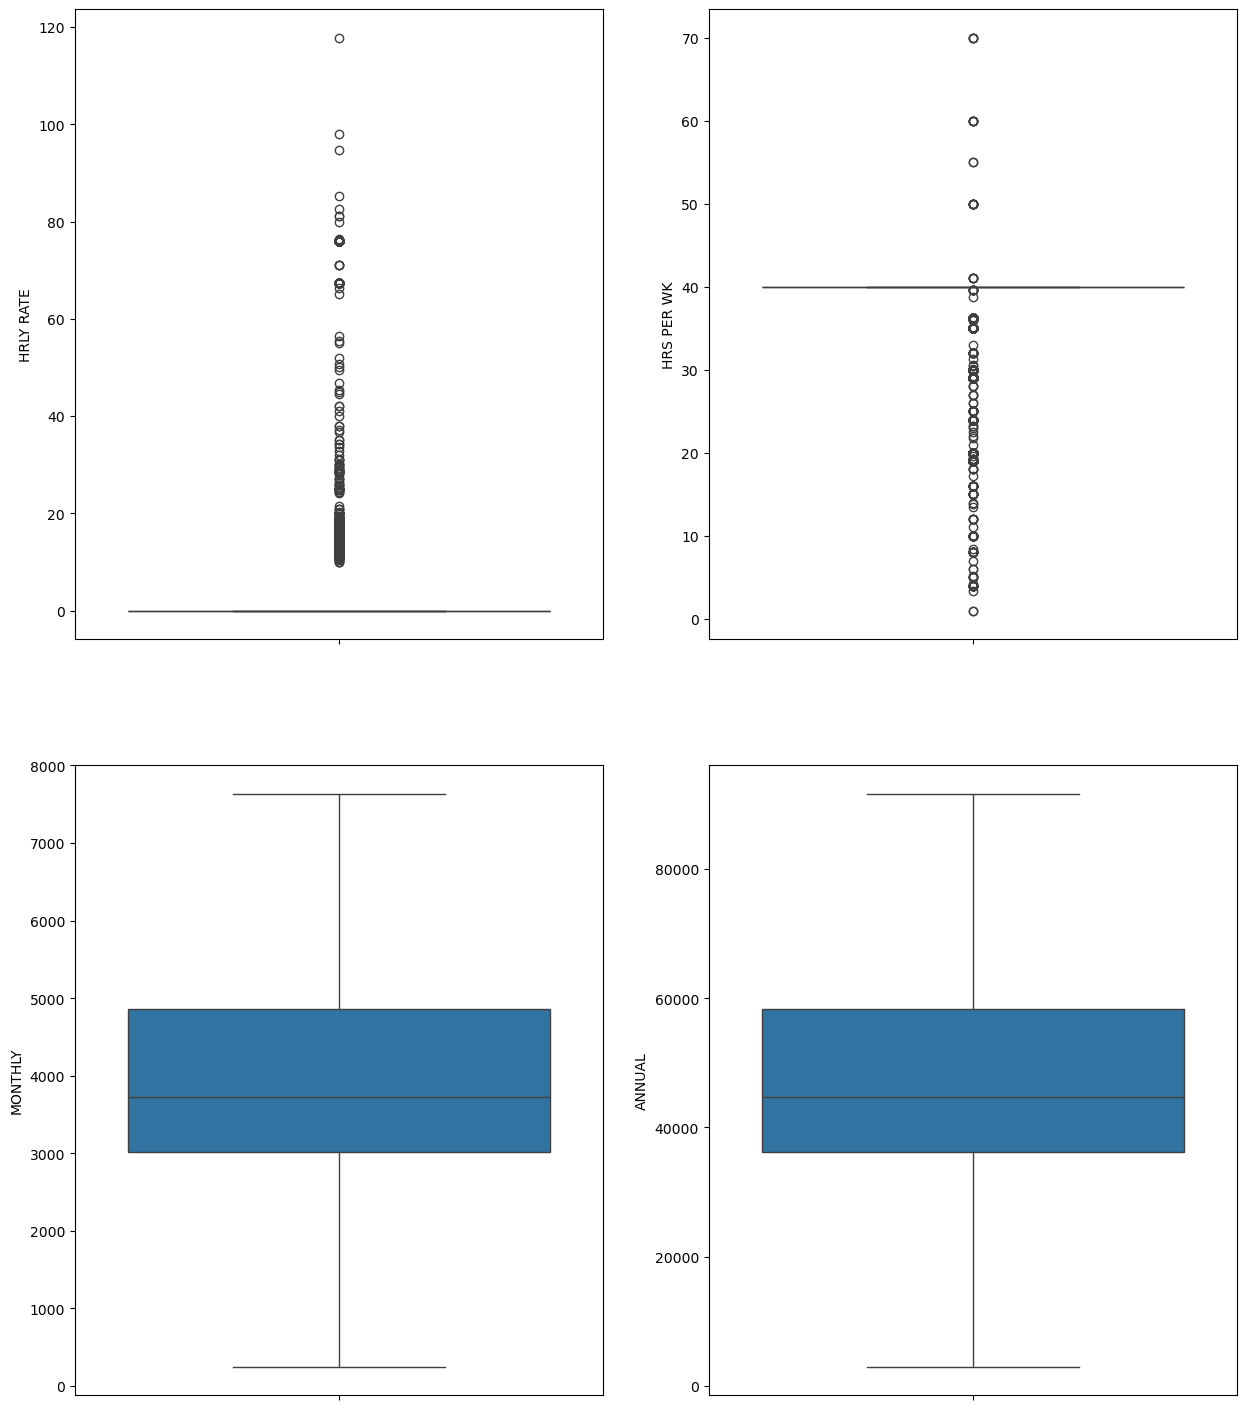

In [13]:
fig, ax = plt.subplots(2,2, figsize= (15,18))
sns.boxplot(data['HRLY RATE'], ax= ax[0,0])
sns.boxplot(data['HRS PER WK'], ax= ax[0,1])
sns.boxplot(data['MONTHLY'], ax= ax[1,0])
sns.boxplot(data['ANNUAL'], ax= ax[1,1])

In [14]:
data.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,7634.765,91617.18
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.770,16857.24


### Salaries and compensation changing over time 

C:\Users\miral.MIRAL-K\AppData\Local\Temp\ipykernel_24692\3074601376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['EMPLOY YEAR'] = pd.to_datetime(data['EMPLOY DATE'], errors='coerce').dt.year


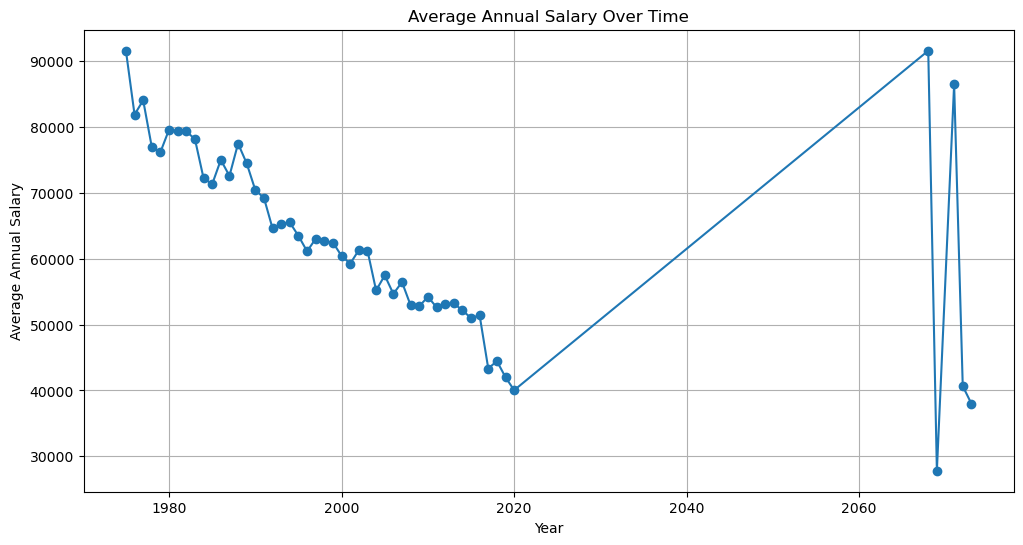

In [15]:


# Convert the "EMPLOY DATE" to datetime and extract the year
data['EMPLOY YEAR'] = pd.to_datetime(data['EMPLOY DATE'], errors='coerce').dt.year

# Calculate the mean annual salary by year, including handling NaNs automatically in the mean calculation
annual_salary_by_year = data.groupby('EMPLOY YEAR')['ANNUAL'].mean().reset_index()

# Plot the trend over time
plt.figure(figsize=(12, 6))
plt.plot(annual_salary_by_year['EMPLOY YEAR'], annual_salary_by_year['ANNUAL'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.title('Average Annual Salary Over Time')
plt.grid(True)
plt.show()


#### EDA ####

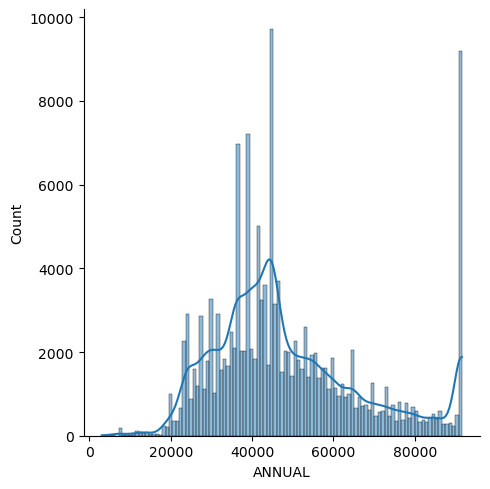

In [16]:
sns.displot(x=data.ANNUAL,kde=True) #The graph follows a bell curve (normally distributed) but has some disparities as well
#this can be because of different Categories of job and Status and department in which the employee is in.

##### Correlation heatmap displaying correaltion between the columns with respect to each other #####

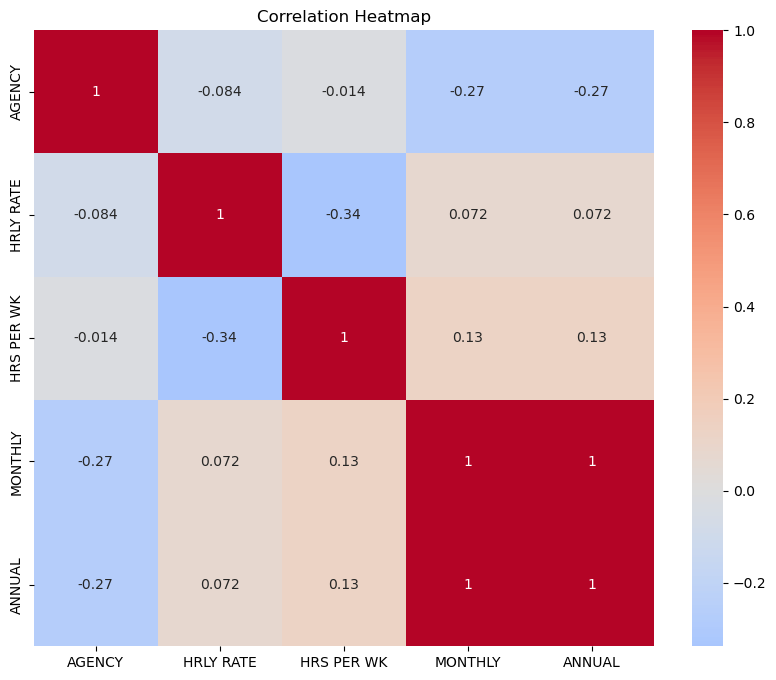

In [17]:
import seaborn as sns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

##### Creating Pivot Table to determine TYpe of employement (STATUS) and their respective Agencies with the annual salary they provide. #####

In [18]:
pd.pivot_table(data, index = ['STATUS','AGENCY NAME'], values = 'ANNUAL')

ANNUAL
STATUS                                   AGENCY NAME                                                     
CRF - CLASSIFIED REGULAR FULL-TIME       ALCOHOLIC BEVERAGE COMMISSION                       59252.214010
                                         BOARD OF ARCHITECTURAL EXAMINERS                    75275.407500
                                         BOARD OF CHIROPRACTIC EXAMINERS                     59073.386667
                                         BOARD OF DENTAL EXAMINERS                           51077.962909
                                         BOARD OF EXAMINERS OF PSYCHOLOGISTS                 48445.975385
...                                                                                                   ...
UTF - UNCLASSIFIED TEMPORARY FULL-TIME   TEXAS LEGISLATIVE COUNCIL                           91617.180000
UTP - UNCLASSIFIED TEMPORARY PART-TIME   HOUSE OF REPRESENTATIVES                            60000.000000
                                         SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED          13666.620000
                                         SENATE                                              13766.865882
                                         TEXAS LEGISLATIVE COUNCIL                           56289.000000

[328 rows x 1 columns]

##### Number of all unique Agencies #####

In [19]:
pd.pivot_table(data, index = ['AGENCY NAME'], values = ['CLASS TITLE'], aggfunc = 'count')


,CLASS TITLE
AGENCY NAME,
ALCOHOLIC BEVERAGE COMMISSION,642
BOARD OF ARCHITECTURAL EXAMINERS,19
BOARD OF CHIROPRACTIC EXAMINERS,10
BOARD OF DENTAL EXAMINERS,56
BOARD OF EXAMINERS OF PSYCHOLOGISTS,15
...,...
THIRD COURT OF APPEALS DISTRICT,32
THIRTEENTH COURT OF APPEALS DISTRICT,30
TREASURY SAFEKEEPING TRUST COMPANY,71


In [20]:
pd.pivot_table(data, index = ['CLASS TITLE','STATUS'], values = 'ANNUAL')

,,ANNUAL
CLASS TITLE,STATUS,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,40403.177143
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,64992.960000
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,59445.274286
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,64422.800000
21 SYSTEMS ADMINISTRATOR III,URF - UNCLASSIFIED REGULAR FULL-TIME,58375.020000
...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,39249.960000
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,42999.960000
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,49451.920000


In [21]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,EMPLOY YEAR
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,7634.765,91617.18,1988
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.770,16857.24,2015
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,7634.765,91617.18,2020
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.770,16857.24,2018
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.270,39411.24,2020


##### Converting Categorical data into numerical data for model Training #####
###### ->We need to use data as gender or ethnicity or status in model training but cannot use string/object in model training thats why we encode them using labelencoder which assigns a numerical value to each new unique field(data value) #####

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
ethnicity_le = LabelEncoder()
gender_le = LabelEncoder()

# Apply label encoding to 'ETHNICITY' and 'GENDER'
data['ETHNICITY'] = ethnicity_le.fit_transform(data['ETHNICITY'].astype(str))
data['GENDER'] = gender_le.fit_transform(data['GENDER'].astype(str))

In [23]:
gender_mapping1 = dict(zip(gender_le.classes_, gender_le.transform(gender_le.classes_)))
print(gender_mapping1)  #Numeric value refering to the label encoder 

gender_mapping2 = dict(zip(ethnicity_le.classes_, ethnicity_le.transform(ethnicity_le.classes_)))
gender_mapping2

{'FEMALE         ': 0, 'MALE           ': 1}


{'AM INDIAN      ': 0,
 'ASIAN          ': 1,
 'BLACK          ': 2,
 'HISPANIC       ': 3,
 'OTHER          ': 4,
 'WHITE          ': 5}

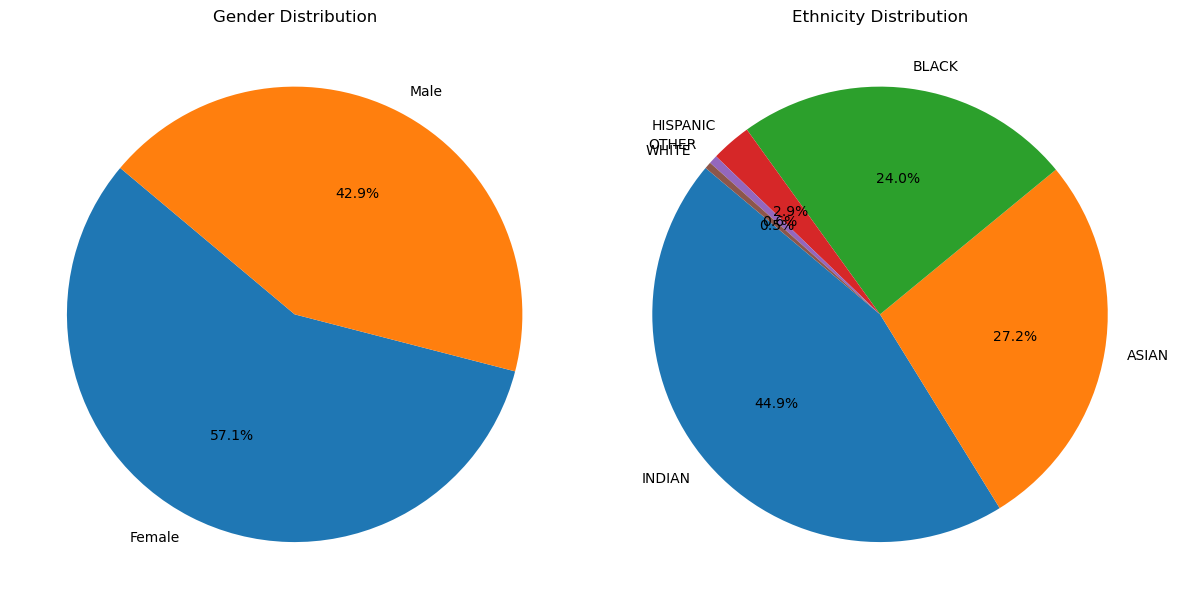

In [24]:
gender_distribution = data['GENDER'].value_counts()
ethnicity_distribution = data['ETHNICITY'].value_counts()

# Draw pie chart for GENDER
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_distribution, labels=("Female","Male"), autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

# Draw pie chart for ETHNICITY
plt.subplot(1, 2, 2)
plt.pie(ethnicity_distribution, labels=("INDIAN",'ASIAN','BLACK','HISPANIC','OTHER',"WHITE"), autopct='%1.1f%%', startangle=140)
plt.title('Ethnicity Distribution')

# Show the plots
plt.tight_layout()
plt.show()

#### Gender distribution among employees, it shows how majority of employees are females (57.1%) & when it comes to ethnicity AM INDIAN and ASIAN contributes for majority of the employees ####

GENDER
0    46661.825372
1    51786.136137
Name: ANNUAL, dtype: float64


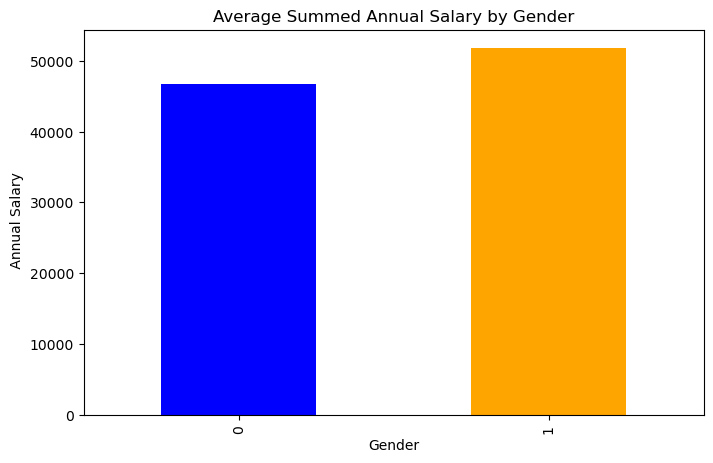

In [25]:
gender_salary_comparison = data.groupby('GENDER')['ANNUAL'].mean()
print(gender_salary_comparison)

# Plotting the bar graph
plt.figure(figsize=(8, 5))
gender_salary_comparison.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel(' Annual Salary')
plt.title('Average Summed Annual Salary by Gender')
plt.xticks()
plt.show()

#### Distribution of Annual Salary between Male and Female are almost the same, There is a slight difference where Male's annual salary is almost 6k higher than female ####

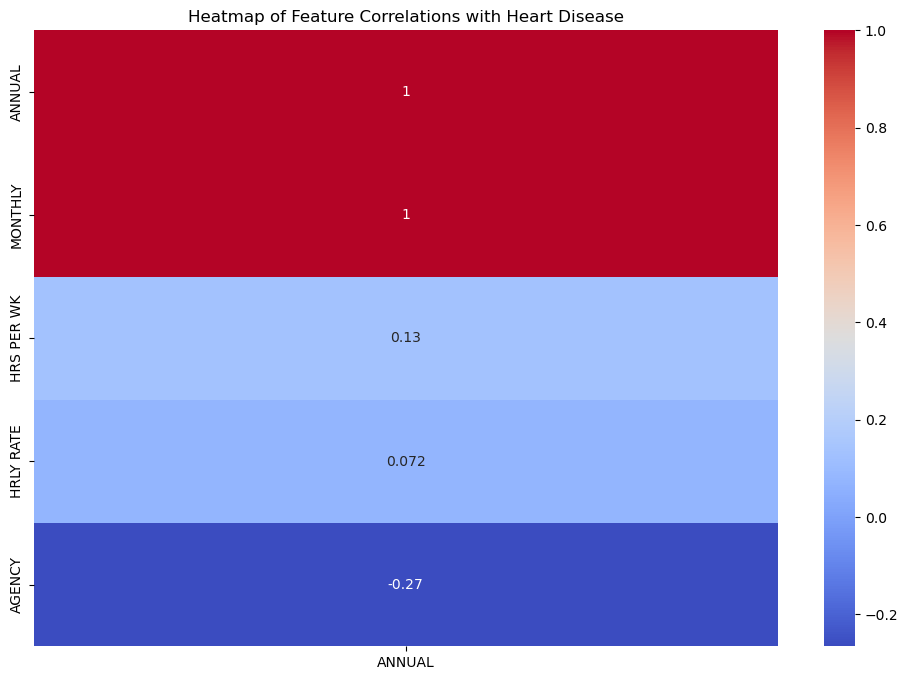

In [26]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
#correlation_matrix = numerical_data.corr()
corr = numerical_data.corr()

# Plot heatmap of feature correlations with heart disease
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['ANNUAL']].sort_values(by='ANNUAL', ascending=False), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations with Heart Disease')
plt.show()

#### Higher correaltion is >0.9 is not preffered as it is not good for model training, shows that the columns are almost the same, and hence one of them should be removed ####

In [27]:
data.drop('MONTHLY', axis=1, inplace=True)

In [28]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,EMPLOY YEAR
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",5,1,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,91617.18,1988
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,5,1,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,16857.24,2015
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",5,1,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,91617.18,2020
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,5,1,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,16857.24,2018
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,3,0,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,39411.24,2020


In [29]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data[['AGENCY NAME','CLASS CODE','CLASS TITLE','STATUS']] = data[['AGENCY NAME','CLASS CODE','CLASS TITLE','STATUS']].apply(enc.fit_transform)

data[['AGENCY NAME','CLASS CODE','CLASS TITLE','STATUS']]

,AGENCY NAME,CLASS CODE,CLASS TITLE,STATUS
0,17,1409,711,8
1,48,616,560,4
2,17,1409,711,8
3,48,616,560,4
4,88,810,292,0
...,...,...,...,...
149476,76,1042,1198,0
149477,76,84,1404,0
149478,76,4,324,1
149479,76,278,1007,0


#### Dataset is highly dependent on the class and status of employees, thus we cannot ignore them while model training. As they are not numeric values (string/categorical) we need to impute them as well like GENDER AND ETHNICITY ####

In [30]:
data.head(3)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,EMPLOY YEAR
0,241,17,RUCKER,MORTON,V,1409,711,5,1,8,02/18/88,75.96150,29.0,91617.18,1988
1,212,48,RUCKER,MORTON,V,616,560,5,1,4,02/01/15,81.04454,4.0,16857.24,2015
2,241,17,SPECIA JR,JOHN,J,1409,711,5,1,8,02/01/20,75.96150,29.0,91617.18,2020


In [31]:
data.drop(columns=['LAST NAME','FIRST NAME','MI','EMPLOY DATE'],axis=1,inplace=True)

### Defining Independent and dependent variables ###

In [32]:
X=data.drop(['ANNUAL'], axis=1)
y=data[['ANNUAL']]

#### Splitting the training and test set ####

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)


#### Using Standard scalar to transform the data by removing the mean and scaling each feature/variable to unit variance.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Model Training

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

#### Finding the best fit of ML model for our use case 
##### 1. Linear Regression:
 Linear Regression predicts the target variable based on a linear relationship with the input features.
 Simple and interpretable, it provides a baseline for understanding how features affect salary.
    
 ##### Advantages: #####
 Easy to implement and interpret.Requires minimal data preparation.
    
 ##### Disadvantages:
 Assumes a linear relationship, which may not capture complexities.Sensitive to outliers.

In [36]:
#Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - R2 Score: {r2_lr:.2f}, MSE: {mse_lr:.2f}")



Linear Regression - R2 Score: 0.27, MSE: 256028983.36



##### 2. Random Forest Regressor:
 An ensemble method that uses multiple decision trees to improve prediction accuracy.Robust to overfitting and handles non-linear relationships, making it suitable for complex datasets like salary prediction.
    
 ##### Advantages: #####
 Handles non-linear relationships well. Reduces overfitting through ensemble learning.

    
 ##### Disadvantages:
 Computationally intensive. Less interpretable compared to simple models.

In [37]:


# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - R2 Score: {r2_rf:.2f}, MSE: {mse_rf:.2f}")


Random Forest - R2 Score: 0.94, MSE: 19490517.01


#### Decision Tree:
A non-linear model that splits data into subsets based on feature values to make predictions. Easy to visualize and interpret. Useful for capturing non-linear relationships in salary data.
#### Advantages:
Simple to understand and interpret.
Captures non-linear relationships.
#### Disadvantages:
Prone to overfitting. Sensitive to small data variations.

In [38]:


# Train the model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree - R2 Score: {r2_dt:.3f}, MSE: {mse_dt:.2f}")


Decision Tree - R2 Score: 0.925, MSE: 26242662.51


#### KNN:
Predicts the target based on the average of the k-nearest neighbors in the feature space. Non-parametric and easy to implement, suitable for understanding local patterns in salary data.
#### Advantages:

Simple and intuitive. Non-parametric, making no assumptions about data distribution.

#### Disadvantages:

Computationally expensive for large datasets. Sensitive to the choice of k and feature scaling

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"K-Neighbors Regressor - R2 Score: {r2_knn:.2f}, MSE: {mse_knn:.2f}")
  

K-Neighbors Regressor - R2 Score: 0.80, MSE: 69735618.09


#### XGBoost Regressor:

An optimized gradient boosting framework designed for high performance and efficiency. Offers state-of-the-art performance for complex regression tasks like salary prediction.
#### Advantages :

High accuracy and efficiency. Robust to overfitting with proper tuning.
#### Disadvantages:

Requires careful parameter tuning. Computationally intensive.

In [40]:
xgb_model = XGBRegressor(max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)
xgb_model.fit(X_train,y_train,eval_metric="rmse",verbose=True)

C:\Users\miral.MIRAL-K\anaconda3\Lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [41]:
y_predict_train = xgb_model.predict(X_train)
predict_xgb = xgb_model.predict(X_test)

In [42]:
print(mean_squared_error(y_test, predict_xgb))
print(r2_score(y_test, predict_xgb))

17515678.11289722
0.9497592297938641


### Hyper Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f"Best Random Forest - R2 Score: {r2_best_rf:.2f}, MSE: {mse_best_rf:.2f}")

print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\miral.MIRAL-K\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Random Forest - R2 Score: 0.95, MSE: 18898047.52
Best Parameters: {'max_depth': 20, 'n_estimators': 300}


#### By hyper parameter tuning , we get an improved model performance with the best parameters to fit in the model such as the optimum number of estimators or depth.

## CONCLUSION 
*
Texas salary dataset shows different class and status of employees and their annual salary which depends on a variety of factors.
By doing EDA we get a lot of insights on the distribution of columns, their importance in predicting the salary.
* 
After cleaning and preprocessing we move to model training and predicting. Here According to the problem statement and dataset, we choose 5 ML algorithms which fits the use case. 
    * KNN
    * Random Forest
    * XGB
    * Linear Regression
    * Decision Tree
* We trained these models in our processed cleaned data and got satisfactory mse values and r2 score. Out of these 5 random forest and          XGBoost give the best performance. 
* Due to the ease with which RandomForest handles non-linear relationships & also reduces overfitting through ensemble learning,we              suggest to go further with this algorithm for deployment. It gives us almost *95%* accuracy while predicting salaries.
    
